In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = tf.keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (val_images, val_labels) = data.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
print("Shape of training images:", training_images.shape)
print("Shape of training labels:", training_labels.shape)
print("Shape of testing images :", val_images.shape)
print("Shape of testing labels :", val_labels.shape)

Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of testing images : (10000, 28, 28)
Shape of testing labels : (10000,)


In [6]:
# Images are stored as matrices
print(training_images[0])
print()
print("Class:", training_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

Class: 9



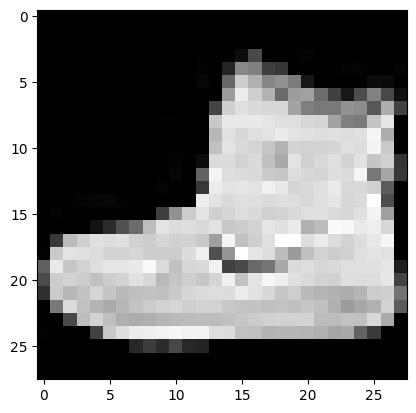

In [7]:
# plot image
plt.imshow(training_images[0], cmap='gray')
print("Class:", training_labels[0])
print()

In [8]:
training_images  = training_images / 255.0
val_images = val_images / 255.0

In [10]:
print(training_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [18]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a single 784-dimensional vector
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class) and softmax activation
])

In [19]:
OPT = 'sgd'
LOSS = 'mse'

model.compile(optimizer= OPT,
              loss= LOSS,
              metrics=['accuracy'])

In [20]:
model.fit(training_images, training_labels, epochs=200, validation_data=(val_images, val_labels))

Epoch 1/200
1875/1875 [==============================] - 8s 4ms/step - loss: 27.6105 - accuracy: 0.1241 - val_loss: 27.6103 - val_accuracy: 0.1070
Epoch 2/200
1875/1875 [==============================] - 6s 3ms/step - loss: 27.6102 - accuracy: 0.1040 - val_loss: 27.6102 - val_accuracy: 0.1027
Epoch 3/200
1875/1875 [==============================] - 7s 4ms/step - loss: 27.6102 - accuracy: 0.1075 - val_loss: 27.6102 - val_accuracy: 0.1086
Epoch 4/200
1875/1875 [==============================] - 6s 3ms/step - loss: 27.6102 - accuracy: 0.1129 - val_loss: 27.6102 - val_accuracy: 0.1127
Epoch 5/200
1875/1875 [==============================] - 6s 3ms/step - loss: 27.6102 - accuracy: 0.1171 - val_loss: 27.6102 - val_accuracy: 0.1165
Epoch 6/200
1875/1875 [==============================] - 5s 3ms/step - loss: 27.6102 - accuracy: 0.1200 - val_loss: 27.6101 - val_accuracy: 0.1199
Epoch 7/200
1875/1875 [==============================] - 6s 3ms/step - loss: 27.6101 - accuracy: 0.1219 - val_loss: 27

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
